# HR Analytics : Employee Attrition Analysis And Workforce Insights




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("Downloads/HR Analytics.csv" , encoding="utf-8-sig" )
df.head(20)

,Ã¯Â»Â¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# Basic Data Understanding


In [3]:
# Dataset Shape
print("Dataset Shape:",df.shape)


Dataset Shape: (1470, 35)


In [4]:
# check Missing Values
print("Missing Values:",df.isnull().sum())


Missing Values: Ã¯Â»Â¿Age                   0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

In [5]:
# Data types
print("Data types:",df.dtypes)


Data types: Ã¯Â»Â¿Age                    int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWor

In [6]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ã¯Â»Â¿Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Ã¯Â»Â¿Age                 1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# check duplicated rows
df.duplicated().sum()

np.int64(0)

# Data Cleaning

In [9]:
# Remove BOM / weird characters completely
df.columns = df.columns.str.replace(r'[^\x00-\x7F]+', '', regex=True)

# Remove extra spaces
df.columns = df.columns.str.strip()

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
#  Remove Unnecessary Columns
df.drop(columns=["EmployeeCount", "StandardHours", "Over18"], inplace=True)

In [12]:
#  Convert attrition into binary
df["Attrition_Flag"] = df["Attrition"].map({"Yes": 1, "No": 0})

In [13]:
# Feature Engineering

In [14]:
# Salary Slab
df["Salary_Slab"] = pd.cut(df["MonthlyIncome"],
                           bins=[0,3000,6000,10000,20000],
                           labels=["Low","Medium","High","Very High"])

In [15]:
# Experience Group
df["Experience_Group"] = pd.cut(df["YearsAtCompany"],
                                bins=[-1,2,5,10,40],
                                labels=["Fresher","Junior","Mid","Senior"])

In [16]:
# Age Group
df["Age_Group"] = pd.cut(df["Age"],
                         bins=[17,25,35,45,60],
                         labels=["18-25","26-35","36-45","45+"])

In [17]:
# Work-Life Risk Flag
df["WorkLife_Risk"] = np.where(
    (df["OverTime"] == "Yes") & (df["WorkLifeBalance"] <= 2),
    "High Risk",
    "Low Risk"
)

 # EDA

In [18]:
# Overall Attrition Rate
attrition_rate = df["Attrition_Flag"].mean() * 100
print(f"\n Overall Attrition Rate: {round(attrition_rate,2)}%")



 Overall Attrition Rate: 16.12%


In [19]:
# Department-wise Attrition
dept_attrition = df.groupby("Department")["Attrition_Flag"].mean() * 100
print("\nDepartment-wise Attrition %:\n", dept_attrition.sort_values(ascending=False))



Department-wise Attrition %:
 Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Attrition_Flag, dtype: float64


In [20]:
# Salary Slab vs Attrition
salary_attrition = df.groupby("Salary_Slab",observed=True)["Attrition_Flag"].mean() * 100
print("\nSalary Slab Attrition %:\n", salary_attrition)


Salary Slab Attrition %:
 Salary_Slab
Low          28.607595
Medium       12.716763
High         12.000000
Very High     8.896797
Name: Attrition_Flag, dtype: float64


In [21]:
# Overtime vs Attrition
overtime_attrition = pd.crosstab(df["OverTime"], df["Attrition"], normalize="index") * 100
print("\nOvertime vs Attrition %:\n", overtime_attrition)


Overtime vs Attrition %:
 Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


In [22]:
# Job Satisfaction vs Attrition
js_attrition = df.groupby("JobSatisfaction")["Attrition_Flag"].mean() * 100
print("\nJob Satisfaction Attrition %:\n", js_attrition)


Job Satisfaction Attrition %:
 JobSatisfaction
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: Attrition_Flag, dtype: float64


In [23]:
# Experience vs Attrition
exp_attrition = df.groupby("Experience_Group",observed=True)["Attrition_Flag"].mean() * 100
print("\nExperience Group Attrition %:\n", exp_attrition)


Experience Group Attrition %:
 Experience_Group
Fresher    29.824561
Junior     13.824885
Mid        12.276786
Senior      8.130081
Name: Attrition_Flag, dtype: float64


# Visualization

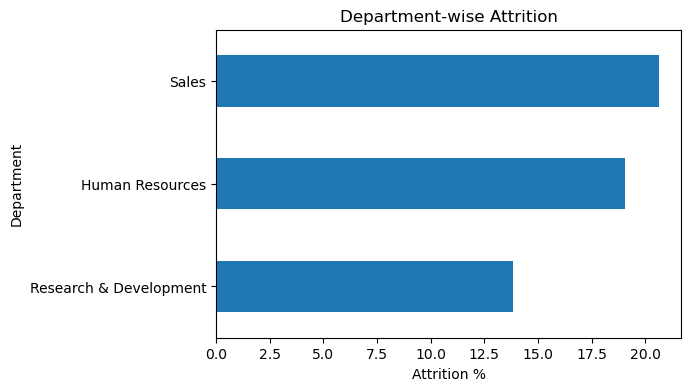

In [24]:
plt.figure(figsize=(6,4))
dept_attrition.sort_values().plot(kind='barh')
plt.title("Department-wise Attrition")
plt.xlabel("Attrition %")
plt.show()

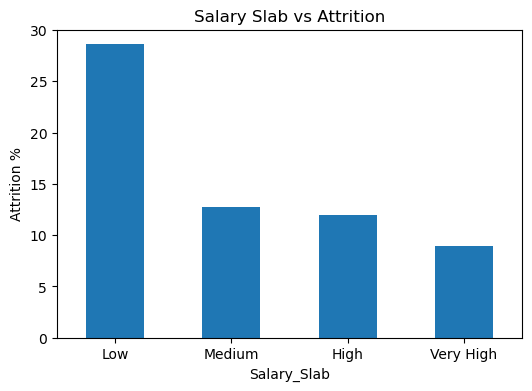

In [25]:
plt.figure(figsize=(6,4))
salary_attrition.plot(kind='bar')
plt.title("Salary Slab vs Attrition")
plt.ylabel("Attrition %")
plt.xticks(rotation=0)
plt.show()

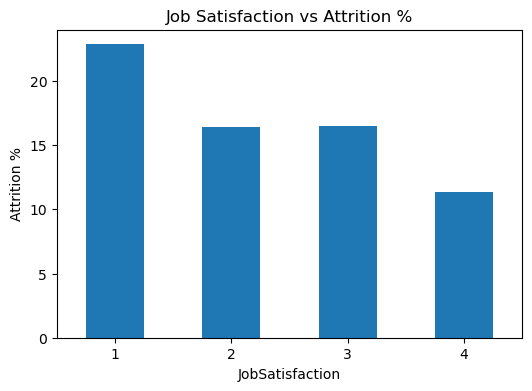

In [26]:
# Job Satisfaction
plt.figure(figsize=(6,4))
js_attrition.plot(kind='bar')
plt.title("Job Satisfaction vs Attrition %")
plt.ylabel("Attrition %")
plt.xticks(rotation=0)
plt.show()

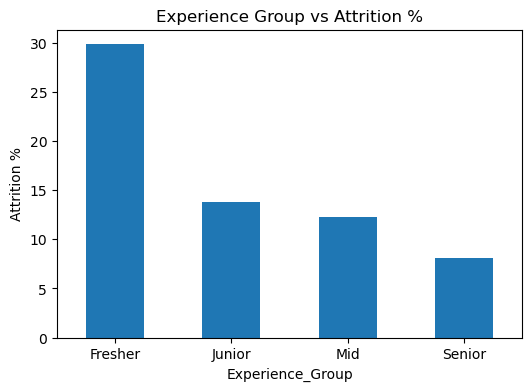

In [27]:
# Experience Group
plt.figure(figsize=(6,4))
exp_attrition.plot(kind='bar')
plt.title("Experience Group vs Attrition %")
plt.ylabel("Attrition %")
plt.xticks(rotation=0)
plt.show()

# Insights  And Recommendation

# Insights
1. Employees with overtime have higher attrition.
2. Low salary slab employees show higher attrition.
3. Freshers have higher chances of leaving the company.
4. Low job satisfaction leads to increased attrition.
5. Poor work-life balance employees fall into high-risk category.
6.  Certain departments (like Sales) show higher attrition compared to others.
# Recommendation
1. Reduce excessive overtime and promote flexible working hours.
2. Revise salary structure for low income employees and add incentives.
3. Improve work-life balance through hybrid work and wellness programs.
4. Introduce mentorship and career growth plans for freshers.
5. Conduct regular feedback surveys to improve job satisfaction.
6. Focus on high attrition departments with targeted retention strategies.

In [28]:
pip install pymysql sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import sys

sys.path.append(r'c:\users\hp\appdata\roaming\python\python313\site-packages')

import pymysql
from sqlalchemy import create_engine


user = 'root'
password = 'Pass123'
host = 'localhost'
database = 'hranalytic'

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")

df.to_sql(name='hr', con=engine, if_exists='replace', index=False)



1470